<a href="https://colab.research.google.com/github/SamuelSousaFerreira/Mercado-Financeiro/blob/main/Bytebank_Credit_Scoring_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd

# Conhecendo os dados

In [71]:
url = 'https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'
dados = pd.read_csv(url)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [72]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [73]:
linhas = dados.shape[0]
colunas = dados.shape[1]

print( 'A base tem %s linhas e %s colunas.' %(linhas,colunas))

A base tem 1000 linhas e 21 colunas.


In [74]:
duplicados = dados.duplicated()
duplicados = duplicados.sum()

print(f'A base de dados tem {duplicados} dados duplicados.')

A base de dados tem 0 dados duplicados.


In [75]:
nulos = dados.isnull().sum()
nulos

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

# Regressão Logística

In [76]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


## 1. Separar em variável(y) dependente e variáveis independentes (x)

In [77]:
y = dados.default
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [78]:
x= dados.drop(columns = 'default') 
x.head()

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


## 2. Separar x em treino e teste



In [79]:
from sklearn.model_selection import train_test_split 

SEED = 77

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, train_size=0.7, random_state=SEED)

In [80]:
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]
print(f'A base de treino tem {base_treino} linhas e a base de teste tem {base_teste} linhas')

A base de treino tem 700 linhas e a base de teste tem 300 linhas


In [81]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter= 1000)

modelo.fit(treino_x,treino_y) #dá erro pq há várias variáveis categóricas e o modelo só funciona com variáveis numéricas, a solução é tranformar em labels numéricas

ValueError: ignored

In [82]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Transformação de categorias

In [83]:
dados.conta_corrente.unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [84]:
#mudando categoria variavel 'conta_corrente'

a = { 'no checking account' : 4,
      '>= 200 DM / salary assignments for at least 1 year' : 3,
      '0 <= ... < 200 DM' : 2,
      '< 0 DM' : 1     
}
dados['conta_corrente'] = dados['conta_corrente'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [85]:
#mudando categoria variavel 'historico_credito'

a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5     
}
dados['historico_credito'] = dados['historico_credito'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [86]:
#mudando categoria variavel 'proposito_emprestimo'

a = { 'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
}
dados['proposito_emprestimo'] = dados['proposito_emprestimo'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [87]:
#mudando categoria variavel 'reserva_cc'

a = { 'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5     
}
dados['reserva_cc'] = dados['reserva_cc'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [88]:
#mudando categoria variavel 'tempo_emprego_atual'

a = { '.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5     
}
dados['tempo_emprego_atual'] = dados['tempo_emprego_atual'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [89]:
#mudando categoria variavel 'sexo_est_civil'

a = { 'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5     
}
dados['sexo_est_civil'] = dados['sexo_est_civil'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [90]:
#mudando categoria variavel 'outros_fiadores'

a = { 'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3    
}
dados['outros_fiadores'] = dados['outros_fiadores'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [91]:
#mudando categoria variavel 'propriedade'

a = { 'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4 
}
dados['propriedade'] = dados['propriedade'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,none,for free,2,skilled employee / official,2,none,yes


In [92]:
#mudando categoria variavel 'outros_planos_financiamento'

a = { 'bank' : 1,
      'stores' : 2,
      'none' : 3 
}

dados['outros_planos_financiamento'] = dados['outros_planos_financiamento'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,3,for free,2,skilled employee / official,2,none,yes


In [93]:
#mudando categoria variavel 'tipo_residencia'

a = { 'rent' : 1,
      'own' : 2,
      'for free' : 3 
}

dados['tipo_residencia'] = dados['tipo_residencia'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,2,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,2,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,2,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,3,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,3,3,2,skilled employee / official,2,none,yes


In [94]:
#mudando categoria variavel 'status_emprego'

a = { 'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
}
dados['status_emprego'] = dados['status_emprego'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,2,2,3,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,2,1,3,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,2,1,2,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,3,1,3,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,3,3,2,3,2,none,yes


In [95]:
#mudando categoria variavel 'telefone'

a = { 'yes, registered under the customers name ' : 1,
      'none' : 0
}
dados['telefone'] = dados['telefone'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,2,2,3,1,1,yes
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,2,1,3,1,0,yes
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,2,1,2,2,0,yes
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,3,1,3,2,0,yes
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,3,3,2,3,2,0,yes


In [96]:
#mudando categoria variavel 'trabalhador_estrangeiro'

a = { 'yes' : 1,
      'no' : 0
}
dados['trabalhador_estrangeiro'] = dados['trabalhador_estrangeiro'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,3,3,2,3,2,0,1


In [97]:
y = dados['default']
x = dados.drop(columns='default')

In [98]:
from numpy.random.mtrand import rand
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y , train_size=0.7, random_state=SEED)

print(f'A base de treino tem {treino_x.shape[0]} linhas e a de teste {teste_x.shape[0]} linhas.')

A base de treino tem 700 linhas e a de teste 300 linhas.


In [111]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x,treino_y)

LogisticRegression(max_iter=1000)

In [124]:
#Acurácia de treino
print(modelo.score(treino_x, treino_y))

0.7471428571428571


# Métricas Estatísticas

## Acurácia de teste

In [116]:
previsoes =modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [123]:
from sklearn.metrics import accuracy_score
#compara as previsões do modelo com o valor real armazenado em teste_y
acuracia = accuracy_score(teste_y,previsoes)
acuracia = round(acuracia,3) * 100
acuracia

81.0

## Matriz de Confusão

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


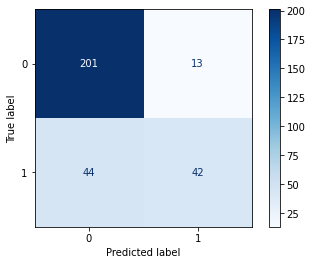

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, cmap='Blues', values_format= '.3g')

matriz_confusao

## Classification Report
Relatório derivado da Matriz de Confusão

In [143]:
from sklearn.metrics import classification_report

print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       214
           1       0.76      0.49      0.60        86

    accuracy                           0.81       300
   macro avg       0.79      0.71      0.74       300
weighted avg       0.80      0.81      0.80       300



## Curva ROC

In [144]:
 from sklearn.metrics import roc_curve, roc_auc_score

In [146]:
prob_previsao = modelo.predict_proba(teste_x)[:,1] #probabilidade do evento ser predito como 1 ou 0
prob_previsao

array([0.13296278, 0.43193943, 0.31860109, 0.63285558, 0.44792155,
       0.12640012, 0.68407454, 0.51089969, 0.24267906, 0.33278678,
       0.09102063, 0.0861332 , 0.06020341, 0.11079859, 0.49299662,
       0.3126588 , 0.08203251, 0.10217354, 0.12227158, 0.39659816,
       0.12940965, 0.38946192, 0.3330519 , 0.50903851, 0.2268462 ,
       0.16179916, 0.11307638, 0.3423607 , 0.2426436 , 0.04669494,
       0.18060735, 0.16168428, 0.31853378, 0.03982596, 0.23005385,
       0.11785044, 0.07960937, 0.72532948, 0.30126211, 0.16648416,
       0.53122821, 0.08236688, 0.2106237 , 0.67015833, 0.9057159 ,
       0.32452383, 0.49767836, 0.19322053, 0.50016756, 0.10631906,
       0.13922205, 0.09579097, 0.74199835, 0.16474074, 0.09511102,
       0.39070329, 0.19905437, 0.48082294, 0.77469933, 0.87108617,
       0.08107576, 0.08749911, 0.05195095, 0.30413295, 0.32759318,
       0.34893909, 0.91869792, 0.4497496 , 0.78486823, 0.25631924,
       0.47200516, 0.13171734, 0.69584896, 0.11394461, 0.07204

roc_auc 0.8173766572484242


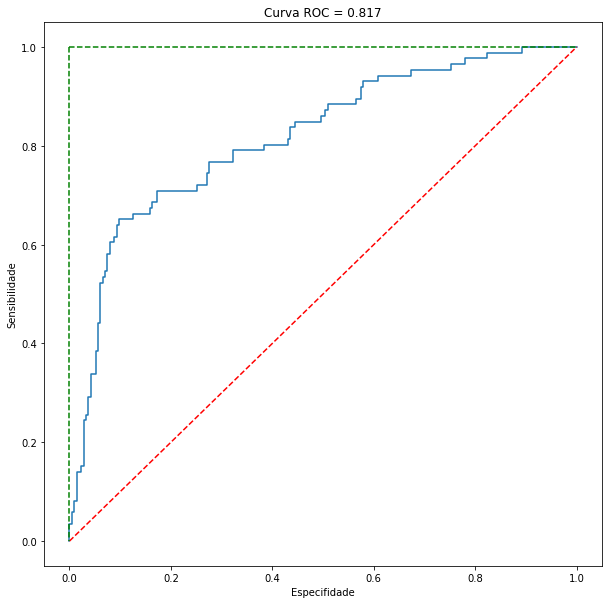

In [157]:
#tfp= taxa de falsos positivos
#tvp = taxa de verdadeiros positivos
tfp, tvp, limite = roc_curve(teste_y, prob_previsao )
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1,figsize=(10,10))
plt.title(f'Curva ROC = {(round(roc_auc_score(teste_y, prob_previsao),3))}')
plt.plot(tfp, tvp)
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.xlabel('Especifidade')#tpf classe 0 classificada com0 1
plt.ylabel('Sensibilidade')# tvp = recall = casos em que a categoria 1 foi classificada corretamente
plt.show()

#área > 0,8 e < 0,9 é uma discriminação excelente

# Análise Descritiva